<a href="https://colab.research.google.com/github/camilasp/Vacinacao_contra_tuberculose_no_Brasil/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relação entre a vacinação contra Tuberculose e o número de casos da doença no Brasil**

##**Objetivo:**

* Analisar o comportamento da cobertura vacinal da vacina contra tuberculose(BCG) nas diferentes regiões e estados brasileiros entre os anos de 2001 e 2020;
* Analisar a variação na quantidade de casos de tuberculose confirmados nas diferentes regiões e estados brasileiros entre 2001 e 2020;
* Verificar se há alguma relação entre a cobertura vacinal e o número de casos de tuberculose.




##**Dados utilizados e Preparação dos dados**:

Foram utilizadas duas bases de dados diferentes, ambas extraídas do Tabnet DATASUS - http://www2.datasus.gov.br/DATASUS/index.php?area=02

Foram coletados os seguintes dados:

* **Cobertura Vacinal**: representa a quantidade de vacinas aplicadas dividida pela população alvo multiplicada por 100. Observamos que o valor ultrapassa o valor "100" em certos anos/Unidades da Federação. Isso provavelmente acontece porque o valor população alvo é um valor estimado que se refere ao número de indivíduos na faixa etária alvo da vacina. Dessa forma, já é possível imaginar que um dos desafios ao se fazer essa análise será a incerteza quanto à porcentagem da população alvo que foi efetivamente vacinada.

* **Número de casos**: representa o número de casos confirmados notificados no sistema de notificação de agravos de notificação - Brasil, por ano e por UF.


Para iniciar, farei a importação das bibliotecas que ajudarão na leitura, limpeza e análise dos dados.

Depois farei a leitura dos dados sobre cobertura vacinal da BCG e número de casos de tuberculose  e armazenarei os dataframes nas variáveis cobertura_vacinal e casos_tuberculose respectivamente. Vou excluir as colunas dos anos anteriores a 2001, pois não serão utilizadas na análise.

Não analisarei os anos anteriores pois pretendo estabelecer uma relação entre a cobertura vacinal e número de casos e nesse último caso, tenho os dados apenas a partir de 2001.

Além disso, farei ua limpeza para facilitar a manipulação dos dados, configuranedo minha coluna uf como index, alterando os nomes dos estados para excluir os números.

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [185]:
cobertura_vacinal= pd.read_csv("https://raw.githubusercontent.com/camilasp/Vacinacao_contra_tuberculose_no_Brasil/main/dados/vacinacao_BCG.csv",  encoding="ISO-8859-1",
                               sep=";", thousands=".", decimal=",", engine= 'python')

In [186]:
cobertura_vacinal.head()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,11 Rondônia,93.86,101.12,104.31,120.42,122.22,113.72,111.60,114.36,102.43,97.42,106.60,109.69,121.15,114.13,105.86,107.64,102.79,105.79,106.12,108.15,110.07,110.77,104.90,97.81,93.61,88.11,70.72,54.48,104.27
1,12 Acre,61.01,110.92,84.33,95.83,99.73,97.32,112.32,134.96,132.91,121.07,116.13,110.46,116.02,122.55,108.57,109.37,114.23,109.63,105.00,106.16,104.59,105.90,99.23,96.83,100.93,93.86,70.09,33.10,104.23
2,13 Amazonas,41.00,88.38,112.77,109.65,108.68,117.20,118.46,108.31,107.78,109.89,118.64,130.49,127.52,125.35,121.18,120.83,115.98,117.27,124.16,116.92,120.39,110.79,95.87,93.82,96.97,93.27,88.17,63.96,107.72
3,14 Roraima,99.64,129.05,126.51,129.41,122.06,137.46,187.41,104.68,116.91,105.42,97.50,107.16,115.45,103.53,95.06,101.81,113.21,115.06,118.08,94.17,103.97,110.55,107.95,116.74,135.55,115.88,97.99,61.96,113.00
4,15 Pará,84.18,107.88,107.83,118.54,85.43,100.51,103.54,118.34,127.04,122.87,128.59,146.91,140.16,136.53,127.68,128.81,124.65,120.12,113.62,117.68,114.80,94.87,81.62,85.83,87.65,83.06,68.34,44.73,109.28


In [187]:
def limpa_dados(dados):

  dados = dados.drop('2021', axis=1)
  dados= dados.drop(27)
  dados = dados.set_index('uf')
  dados.index = dados.index.str[3:]#alterando o meu index pra excluir os numerais da frente dos nomes dos estados

  return dados

In [188]:
mapa = {'Unidade da Federação': 'uf'}
cobertura_vacinal.rename(columns=mapa, inplace=True)
cobertura_vacinal = cobertura_vacinal.drop(' Total', axis=1)

In [189]:
cobertura_vacinal=limpa_dados(cobertura_vacinal)

In [190]:
colunas= cobertura_vacinal.columns[7:]
cobertura_vacinal=cobertura_vacinal[colunas]

In [191]:
cobertura_vacinal.T.head()

uf,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2001,114.36,134.96,108.31,104.68,118.34,181.41,122.08,122.47,116.52,118.81,107.28,121.52,118.78,111.00,112.29,117.46,102.86,106.58,106.79,111.03,112.38,104.27,104.48,120.00,115.54,110.42,122.91
2002,102.43,132.91,107.78,116.91,127.04,129.05,113.06,118.94,109.56,110.69,114.24,112.80,123.86,122.14,105.13,107.19,97.29,108.58,110.33,108.99,106.78,102.76,103.68,114.94,112.31,112.81,116.89
2003,97.42,121.07,109.89,105.42,122.87,123.55,102.09,119.88,101.91,103.20,113.32,109.52,126.01,115.74,104.74,106.68,91.92,110.03,111.00,108.87,105.89,101.99,103.81,108.05,108.02,111.28,115.71
2004,106.60,116.13,118.64,97.50,128.59,121.20,109.27,129.81,113.52,115.70,111.53,120.51,121.69,123.39,107.35,123.28,108.04,110.09,109.32,109.14,104.83,103.76,101.99,99.81,111.56,121.32,115.74
2005,109.69,110.46,130.49,107.16,146.91,123.56,110.81,132.83,108.98,118.57,112.21,125.97,117.31,118.76,104.81,124.43,108.89,108.75,115.50,106.30,104.32,103.14,103.22,102.71,113.86,116.34,109.26


In [192]:
casos_tuberculose= pd.read_csv("https://raw.githubusercontent.com/camilasp/Vacinacao_contra_tuberculose_no_Brasil/main/dados/Tuberculose_total_casos.csv", encoding="ISO-8859-1",
                               sep=",", thousands=".", decimal=",", engine= 'python', skiprows=3, skipfooter=18)

In [193]:
casos_tuberculose.tail()

,UF de notificação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
23,50 Mato Grosso do Sul,957,897,973,1047,1085,898,960,1020,1052,926,1046,1092,1097,995,1003,1132,1128,1445,1413,1224,3,21393
24,51 Mato Grosso,1359,1259,1230,1172,1350,1312,1154,1262,1183,1359,1352,1587,1891,1829,1406,1512,1425,1407,1541,1238,8,27836
25,52 Goiás,1111,1126,1235,1093,1104,993,963,955,1000,1020,986,1054,1076,993,1093,1031,1143,1217,1165,991,8,21357
26,53 Distrito Federal,612,593,613,626,619,608,633,510,460,414,492,555,467,531,472,462,403,469,482,409,6,10436
27,Total,83655,92089,93837,92987,91453,87327,83823,86452,86713,85408,87624,86134,86851,85018,85336,85900,91354,95390,97871,86044,943,1772254


In [194]:
mapa = {'UF de notificação': 'uf'}
casos_tuberculose.rename(columns=mapa, inplace=True)


In [195]:
casos_tuberculose= limpa_dados(casos_tuberculose)

##**Análise Exploratória**

**Para iniciar, vou ordenar meu dataframe pela média da cobertura vacinal ao longo dos anos, para verificar quais estados apresentam maior e menor cobertura ao longo do tempo.**

In [196]:
media_por_estado= cobertura_vacinal.T.mean().to_list()


In [197]:
ordenado_por_total =cobertura_vacinal.copy()

In [198]:
ordenado_por_total['media']= media_por_estado

In [199]:
ordenado_por_total = ordenado_por_total.sort_values("media",ascending=False)
ordenado_por_total 

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,media
uf,,,,,,,,,,,,,,,,,,,,,
Amapá,181.41,129.05,123.55,121.20,123.56,121.68,113.26,115.66,115.77,115.69,111.74,105.80,117.07,118.80,121.56,113.86,93.89,102.95,100.27,71.57,115.9170
Maranhão,122.47,118.94,119.88,129.81,132.83,138.46,141.55,134.02,132.63,125.32,122.77,114.07,113.39,108.16,103.64,90.11,105.69,105.11,83.57,64.03,115.3225
Pará,118.34,127.04,122.87,128.59,146.91,140.16,136.53,127.68,128.81,124.65,120.12,113.62,117.68,114.80,94.87,81.62,85.83,87.65,83.06,68.34,113.4585
Amazonas,108.31,107.78,109.89,118.64,130.49,127.52,125.35,121.18,120.83,115.98,117.27,124.16,116.92,120.39,110.79,95.87,93.82,96.97,93.27,88.17,112.1800
Paraíba,121.52,112.80,109.52,120.51,125.97,125.87,124.46,123.87,118.19,110.46,113.41,108.66,112.35,111.91,105.73,97.27,104.00,105.35,94.90,63.57,110.5160
Mato Grosso do Sul,120.00,114.94,108.05,99.81,102.71,104.31,105.88,102.39,104.29,105.23,107.48,105.36,113.25,129.71,129.60,106.14,122.81,129.56,114.25,61.55,109.3660
Pernambuco,118.78,123.86,126.01,121.69,117.31,116.60,114.41,113.27,112.83,107.59,110.45,106.89,105.68,108.55,110.06,98.90,97.25,106.53,92.07,76.29,109.2510
Acre,134.96,132.91,121.07,116.13,110.46,116.02,122.55,108.57,109.37,114.23,109.63,105.00,106.16,104.59,105.90,99.23,96.83,100.93,93.86,70.09,108.9245
Roraima,104.68,116.91,105.42,97.50,107.16,115.45,103.53,95.06,101.81,113.21,115.06,118.08,94.17,103.97,110.55,107.95,116.74,135.55,115.88,97.99,108.8335


**Abaixo, um gráfico que mostra a média de cobertura da vacina BCG por Estado entre 2001 e 2020. Praticamente todas as médias estão acima de 100, com apenas 3 estados abaixo dessa média, que no entanto estão muitíssimo próximos dela(maior que 99%).**

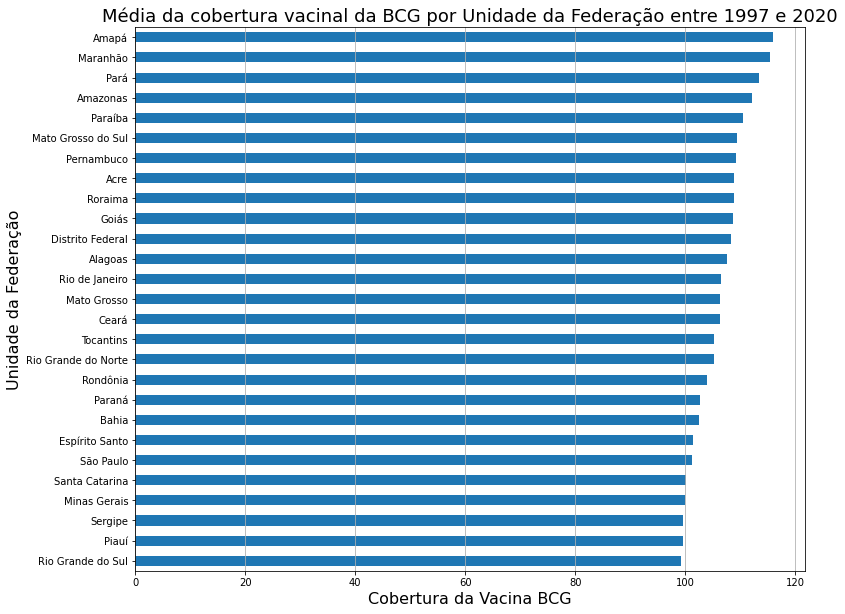

In [200]:
plt.figure(figsize=(12,10))
ax = ordenado_por_total['media'].sort_values(ascending= True).plot(kind="barh")
ax.set_xlabel('Cobertura da Vacina BCG', fontsize=16)
ax.set_ylabel("Unidade da Federação", fontsize=16)
plt.title("Média da cobertura vacinal da BCG por Unidade da Federação entre 1997 e 2020", fontsize=18)
plt.grid(axis='x')
plt.show()

**Agora vamos ver como se comporta a cobertura da vacina BCG por ano (média nacional).**

In [201]:
cobertura_por_ano=ordenado_por_total.T.drop('media')

In [202]:
cobertura_por_ano.tail()

uf,Amapá,Maranhão,Pará,Amazonas,Paraíba,Mato Grosso do Sul,Pernambuco,Acre,Roraima,Goiás,Distrito Federal,Alagoas,Rio de Janeiro,Mato Grosso,Ceará,Tocantins,Rio Grande do Norte,Rondônia,Paraná,Bahia,Espírito Santo,São Paulo,Santa Catarina,Minas Gerais,Sergipe,Piauí,Rio Grande do Sul
2016,113.86,90.11,81.62,95.87,97.27,106.14,98.90,99.23,107.95,92.31,138.11,104.97,106.29,96.55,108.82,99.23,89.26,104.90,94.11,84.07,90.61,94.33,102.01,89.41,97.11,83.90,94.42
2017,93.89,105.69,85.83,93.82,104.00,122.81,97.25,96.83,116.74,88.67,93.61,110.92,115.38,96.61,109.59,104.75,67.22,97.81,96.31,86.96,91.93,100.95,87.04,94.81,98.50,93.94,91.29
2018,102.95,105.11,87.65,96.97,105.35,129.56,106.53,100.93,135.55,93.58,89.50,112.92,105.72,106.14,104.89,104.06,107.70,93.61,97.93,84.27,99.98,101.28,92.72,100.85,106.33,97.90,90.98
2019,100.27,83.57,83.06,93.27,94.90,114.25,92.07,93.86,115.88,86.73,93.24,91.54,79.62,90.11,86.05,112.41,85.29,88.11,91.19,78.05,90.10,83.78,83.43,88.76,85.41,82.58,87.83
2020,71.57,64.03,68.34,88.17,63.57,61.55,76.29,70.09,97.99,78.00,90.56,67.23,60.02,83.46,65.55,89.69,77.45,70.72,88.49,74.82,77.34,67.18,79.94,81.50,69.65,76.14,81.81


In [203]:
cobertura_por_ano=cobertura_por_ano.reset_index().melt(id_vars="index", value_vars=cobertura_por_ano.columns) # mudando as dimensões da minha matriz de dados

In [204]:
cobertura_por_ano.columns=['ano', 'uf', 'taxa_de_vacinacao'] #renomeando minhas colunas

In [205]:
cobertura_por_ano

,ano,uf,taxa_de_vacinacao
0,2001,Amapá,181.41
1,2002,Amapá,129.05
2,2003,Amapá,123.55
3,2004,Amapá,121.20
4,2005,Amapá,123.56
...,...,...,...
535,2016,Rio Grande do Sul,94.42
536,2017,Rio Grande do Sul,91.29
537,2018,Rio Grande do Sul,90.98
538,2019,Rio Grande do Sul,87.83


Vou criar uma função para me ajudar a plotar uns gráficos evitando repetição de código:

In [206]:
def plotar(data, yplot, ylabel, title, cor, maxx=None):
  plt.figure(figsize=(12,8))
  ax=sns.lineplot(data=data, x='ano', y= yplot, hue='uf')
  plt.xticks(rotation=45)
  plt.ylim(0,maxx)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  font = {'family': 'serif',
        'color':  cor,
        'weight': 'normal',
        'size': 16,
        }
  plt.xlabel('Ano', fontdict=font)
  plt.ylabel(ylabel,  fontdict=font)
  plt.title(title, fontdict=font)
  plt.grid()
  plt.show()

**O gráfico abaixo mostra a variação da cobertura vacinal ao longo dos anos. Podemos verificar que há uma tendência de queda dessa taxa, que se torna mais visível a partir de 2018.**

**A média da cobertura varia entre 120 e 80 aproximadamente, sendo que a partir de 2016 esteve quase sempre abaixo dos 100.**

No handles with labels found to put in legend.


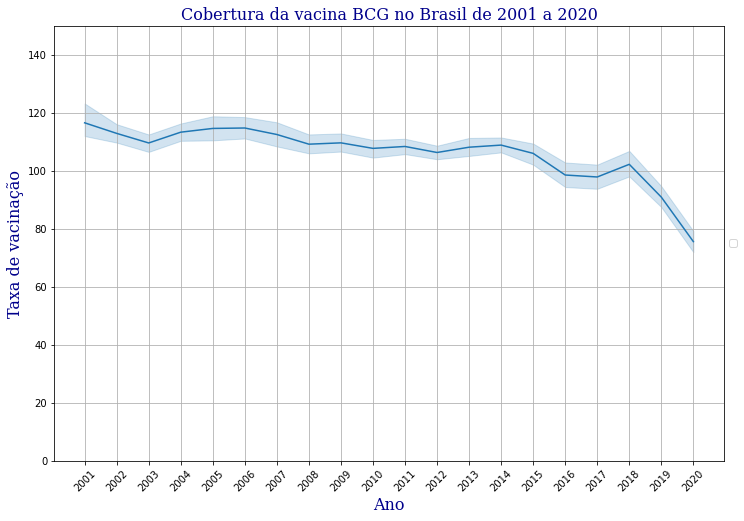

In [207]:
plt.figure(figsize=(12,8))
ax=sns.lineplot(data=cobertura_por_ano, x='ano', y= 'taxa_de_vacinacao')
plt.xticks(rotation=45)
plt.ylim(0,150)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('Ano', fontdict=font)
plt.ylabel('Taxa de vacinação', fontdict=font)
plt.title('Cobertura da vacina BCG no Brasil de 2001 a 2020', fontdict=font)
plt.grid()
plt.show()

**Abaixo, um gráfico mostrando a mesma variação da taxa de cobertura ao longo dos anos, dessa vez, ao invés da média nacional, temos um linha para cada estado.**

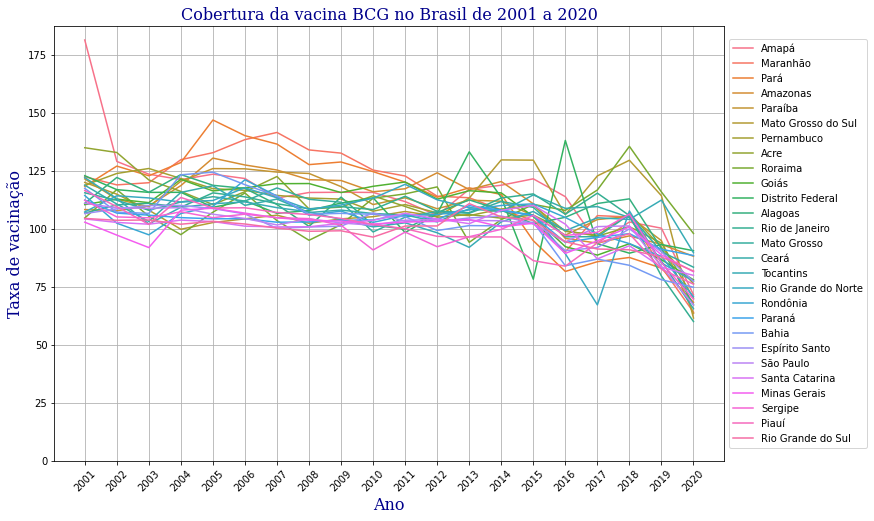

In [208]:
plot_brasil=plotar(cobertura_por_ano,"taxa_de_vacinacao", "Taxa de vacinação", "Cobertura da vacina BCG no Brasil de 2001 a 2020", 'darkblue')


**Este gráfico não permite verificar o comportamento dos estados individualmente. Vou dividir meus estados por região, para melhorar a visualização:**

In [209]:
lista= cobertura_vacinal.index.to_list()

In [210]:
lista

['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

In [211]:
lista_norte= lista[:7]
lista_nordeste= lista[7:16]
lista_sudeste= lista[16:20]
lista_sul=lista[20:23]
lista_centroeste= lista[23:]

In [212]:
norte = cobertura_por_ano.query('uf in @lista_norte')
nordeste = cobertura_por_ano.query('uf in @lista_nordeste')
sudeste = cobertura_por_ano.query('uf in @lista_sudeste')
sul = cobertura_por_ano.query('uf in @lista_sul')
centroeste = cobertura_por_ano.query('uf in @lista_centroeste')


In [213]:
norte

,ano,uf,taxa_de_vacinacao
0,2001,Amapá,181.41
1,2002,Amapá,129.05
2,2003,Amapá,123.55
3,2004,Amapá,121.20
4,2005,Amapá,123.56
...,...,...,...
355,2016,Rondônia,104.90
356,2017,Rondônia,97.81
357,2018,Rondônia,93.61
358,2019,Rondônia,88.11


**Observa-se nos Estados do Norte também a tendência de queda na cobertura vacinal pela BCG, sendo a queda bastante visível para o Estado do Pará, representado pela linha laranja no gráfico.**

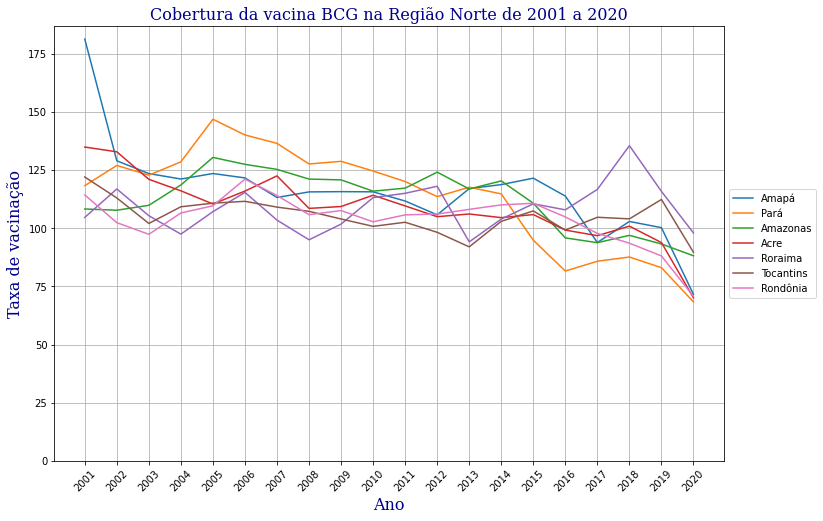

In [214]:
plot_norte=plotar(norte,"taxa_de_vacinacao", "Taxa de vacinação", "Cobertura da vacina BCG na Região Norte de 2001 a 2020", 'darkblue')

**Os Estados do Nordeste também com tendência de queda da cobertura da vacina BCG a partir de 2015, com destaque para Piauí, Bahia e Rio Grande do Norte.**

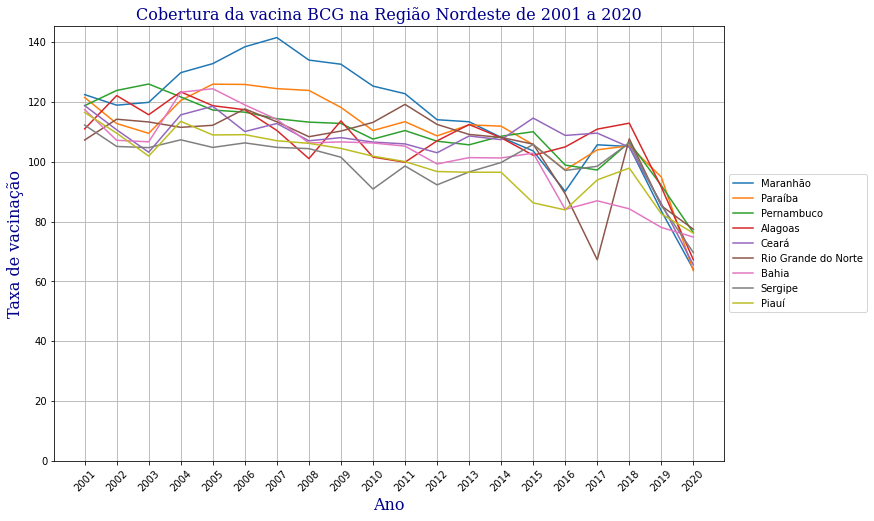

In [215]:
plot_nordeste=plotar(nordeste,"taxa_de_vacinacao", "Taxa de vacinação", "Cobertura da vacina BCG na Região Nordeste de 2001 a 2020", 'darkblue')

**Verificamos a mesma tendência de queda no Sudeste a partir de 2015, ficando mais evidente a partir de 2018.**

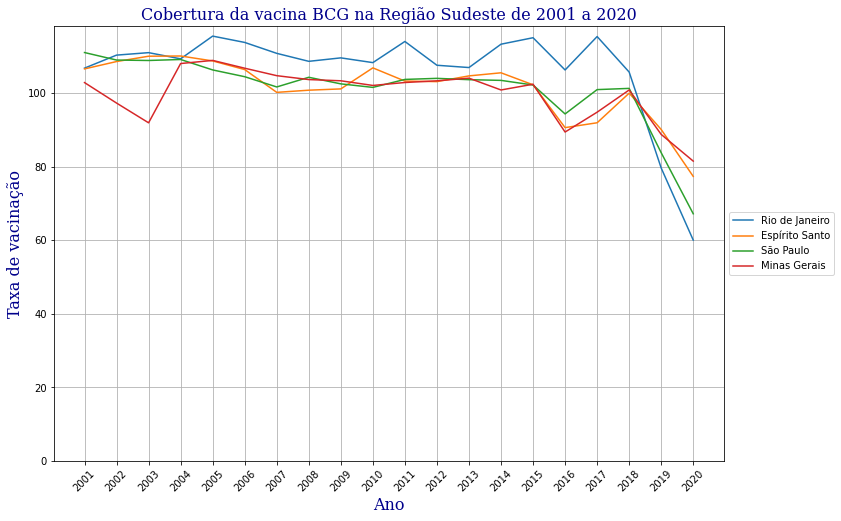

In [216]:
plot_sudeste=plotar(sudeste,"taxa_de_vacinacao", "Taxa de vacinação", "Cobertura da vacina BCG na Região Sudeste de 2001 a 2020", 'darkblue')

**Região Sul com tendência de queda da cobertura da vacina BCG a partir de 2016, com comportamento muito similar da taxa para os três Estados da Região ao longo de todo o período analisado. No caso dos três EStados a taxa tem se mantido abaixo dos 100% desde 2017**

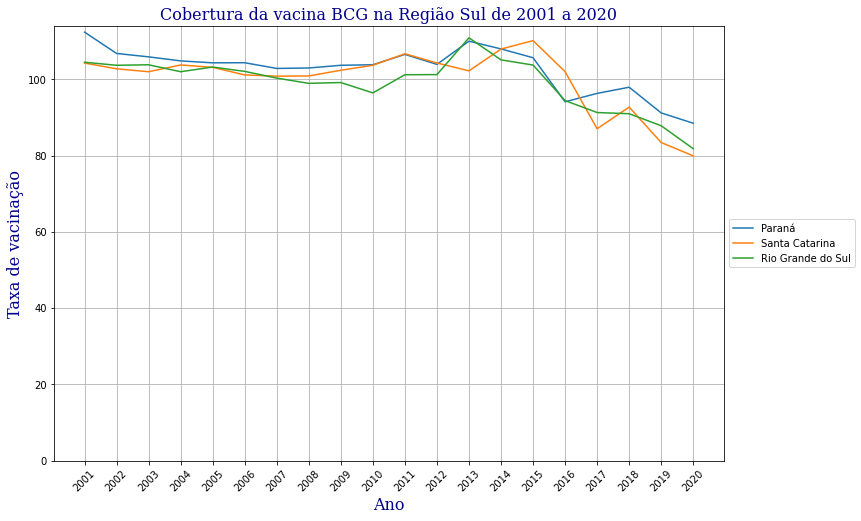

In [217]:
plot_sul=plotar(sul,"taxa_de_vacinacao", "Taxa de vacinação", "Cobertura da vacina BCG na Região Sul de 2001 a 2020", 'darkblue')

**Na região Centro-Oeste são visíveis os picos de alta cobertura e baixa cobertura no caso do DF e Mato Grosso do Sul e uma estabilidade da taxa, seguida por queda a partir de 2015 no caso de Goiás e Mato Grosso.**

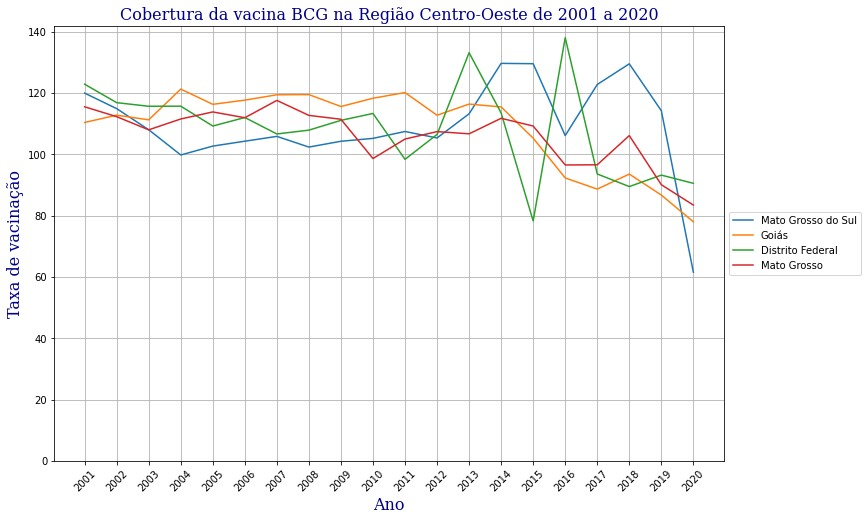

In [218]:
plot_centroeste=plotar(centroeste,"taxa_de_vacinacao", "Taxa de vacinação", "Cobertura da vacina BCG na Região Centro-Oeste de 2001 a 2020", 'darkblue')

**Casos de Tuberculose**

In [219]:
ordenado= casos_tuberculose.sort_values(by= ['Total'], ascending=False)
ordenado= ordenado.drop(['Total'], axis=1)

In [220]:
ordenado =ordenado.T
ordenado_melt= ordenado.reset_index().melt(id_vars="index")

In [221]:
ordenado_melt

,index,uf,value
0,2001,São Paulo,18649
1,2002,São Paulo,19867
2,2003,São Paulo,19204
3,2004,São Paulo,18612
4,2005,São Paulo,17746
...,...,...,...
535,2016,Roraima,162
536,2017,Roraima,206
537,2018,Roraima,262
538,2019,Roraima,323


In [222]:
ordenado_melt.columns=['ano', 'uf', 'total_de_casos']

In [223]:
total_casos_ano=  ordenado_melt.groupby("ano").sum()

In [224]:
total_casos_ano

,total_de_casos
ano,
2001,83655
2002,92089
2003,93837
2004,92987
2005,91453
2006,87327
2007,83823
2008,86452
2009,86713


**O gráfico abaixo mostra a variação do número total de casos confirmados por ano de tuberculose em todo Brasil, no período de 2001 a 2020. De 2017 a 2019 podemos notar o crescimento do número de casos, se compararmos com o período de 2007 a 2016, quando o número de casos se manteve estável.**

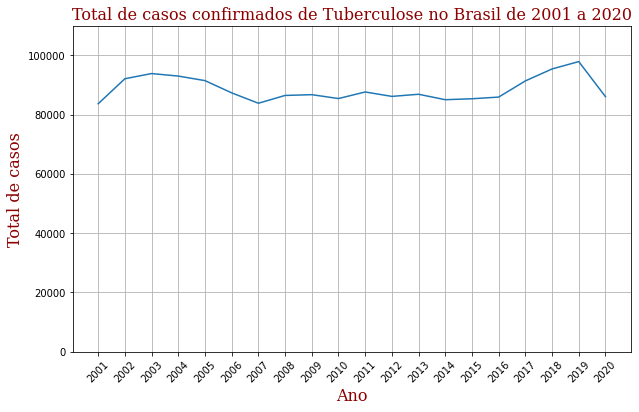

In [225]:
plt.figure(figsize=(10,6))
ax=sns.lineplot(data= total_casos_ano, x='ano', y= 'total_de_casos')
plt.xticks(rotation=45)
plt.ylim(0,110000)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('Ano', fontdict=font)
plt.ylabel('Total de casos', fontdict=font)
plt.title('Total de casos confirmados de Tuberculose no Brasil de 2001 a 2020', fontdict=font)
plt.grid()
plt.show()

**A versão abaixo mostra o comportamento dessa curva de crescimento de mais perto. Podemos ver que o número de casos subiu de um patamar de cerca de 85000 casos/ano e chegou a cerca de 97000 em 2019, o que representa um crescimento de 14% em relação ao patamar anterior. Em 2020, o total de casos voltou para perto da média de 85000 dos anos anteriores a 2017.**

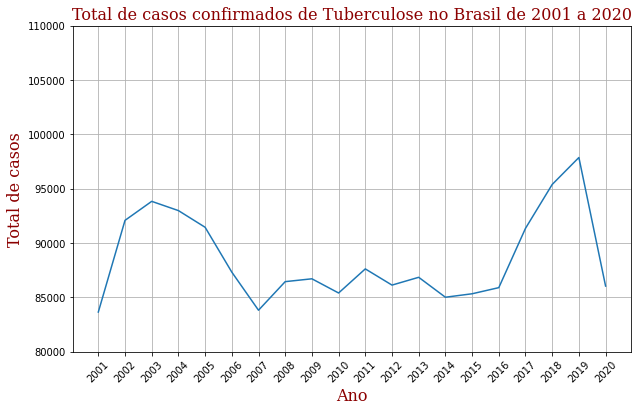

In [226]:
plt.figure(figsize=(10,6))
ax=sns.lineplot(data= total_casos_ano, x='ano', y= 'total_de_casos')
plt.xticks(rotation=45)
plt.ylim(80000,110000)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('Ano', fontdict=font)
plt.ylabel('Total de casos', fontdict=font)
plt.title('Total de casos confirmados de Tuberculose no Brasil de 2001 a 2020', fontdict=font)
plt.grid()
plt.show()

**Passemos a avaliar por Região:**

In [227]:
norte_casos = ordenado_melt.query('uf in @lista_norte')
nordeste_casos = ordenado_melt.query('uf in @lista_nordeste')
sudeste_casos = ordenado_melt.query('uf in @lista_sudeste')
sul_casos = ordenado_melt.query('uf in @lista_sul')
centroeste_casos = ordenado_melt.query('uf in @lista_centroeste')


**Abaixo, o gráfico que mostra o número de casos por ano a partir de 2001 para os Estados da Região Norte. Pará e Amazonas apresentam um crescimento considerável do número de casos, enquanto os demais estados parecem manter uma quantidade de casos/ano estável, porém como a faixa de casos é muito pequena, é difícil dizer apenas com base nesse gráfico.**

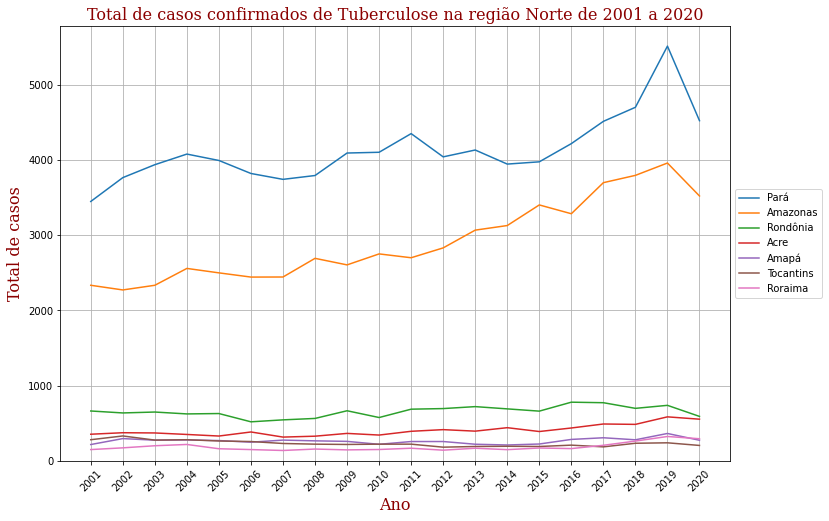

In [228]:

plot_norte=plotar(norte_casos,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na região Norte de 2001 a 2020", 'darkred')



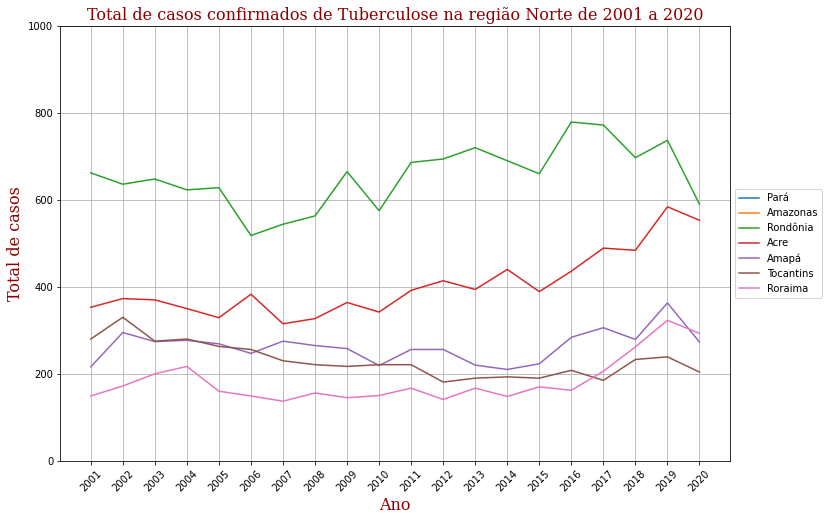

In [245]:

plot_norte=plotar(norte_casos,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na região Norte de 2001 a 2020", 'darkred', maxx= 1000)

**No caso da Região Nordeste, há tendência de estabilidade ou queda do número de casos na maioria dos Estados, com exceção de Pernambuco, onde o número de casos esteve em ascensão até 2019, Rio Grande do Norte e Sergipe. Foi necessária uma segunda visualização para permitir que ficasse evidente o aumento nesses dois últimos Estados.**

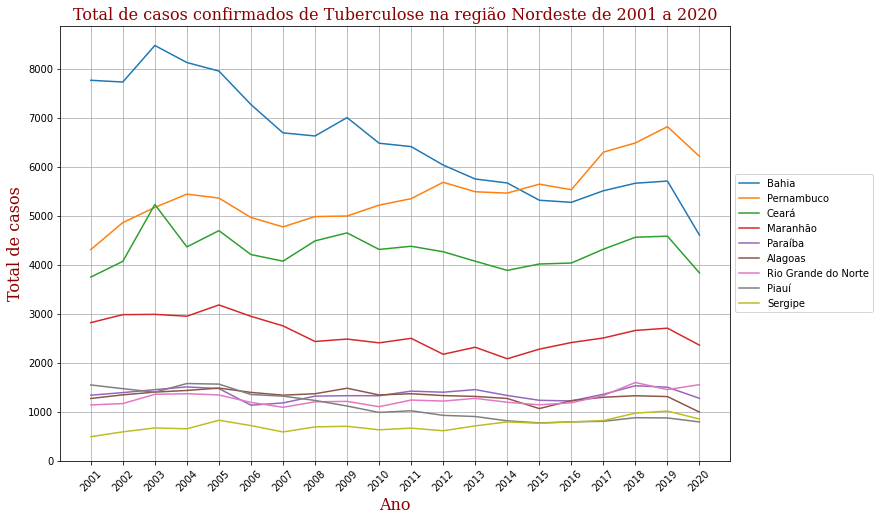

In [229]:
plot_nordeste=plotar(nordeste_casos,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na região Nordeste de 2001 a 2020", 'darkred')


In [243]:
menores= nordeste_casos.query('uf=="Rio Grande do Norte"| uf== "Sergipe" | uf == "Piauí"| uf == "Alagoas" | uf == "Paraíba"')

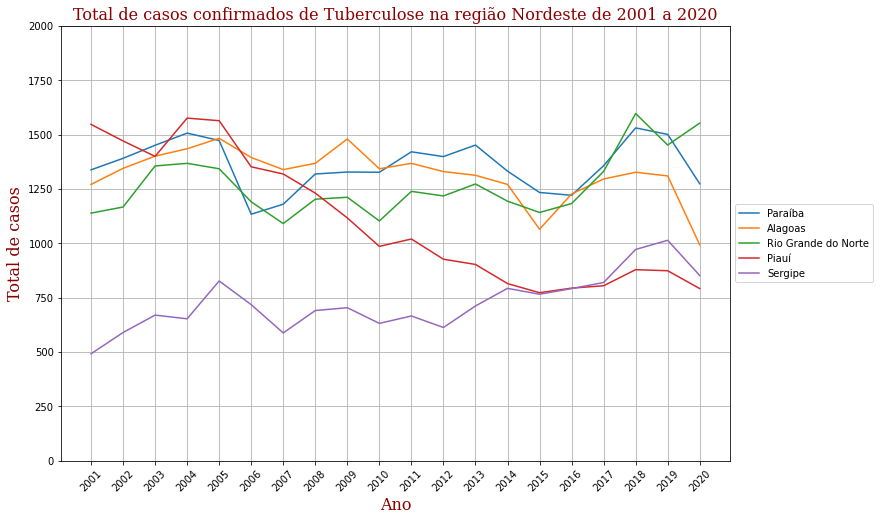

In [244]:
plot_nordeste=plotar(menores,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na região Nordeste de 2001 a 2020", 'darkred', maxx=2000)

**Na Região Sudeste, o número de casos no Espírito Santo e Minas Gerais se mantiveram estáveis ao longo das duas últimas décadas. Rio de Janeiro e São Paulo tem oscilações, sendo que no caso de São Paulo houve um aumento considerável do número de casos entre 2017 e 2019.**

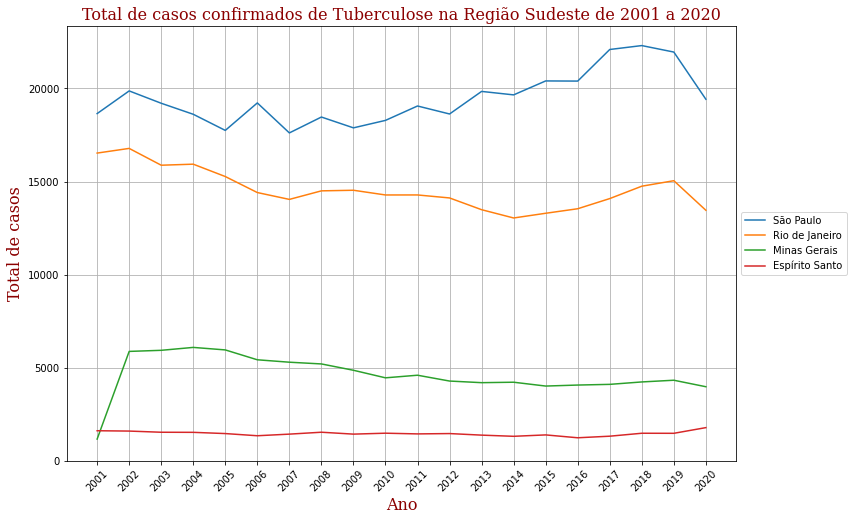

In [230]:
plot_sudeste=plotar(sudeste_casos,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na Região Sudeste de 2001 a 2020", 'darkred')


**Na Região Sul, o Estado com maior variação no número de casos é o Rio Grande do Sul, onde este número variou entre 5000 e quase 8000 casos ao longo dos anos, com grande crescimento dos casos entre 2017 e 2019, seguido de queda em 2020.**

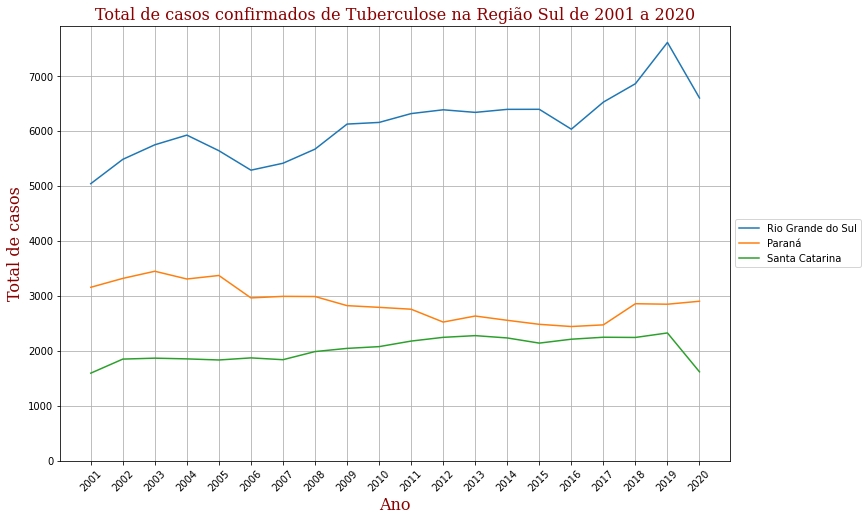

In [231]:

plot_sul=plotar(sul_casos,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na Região Sul de 2001 a 2020", 'darkred')

**No Centro-Oeste, vemos dois picos de casos com clareza, sendo um no Mato Grosso e outro no Mato Grosso do Sul.**

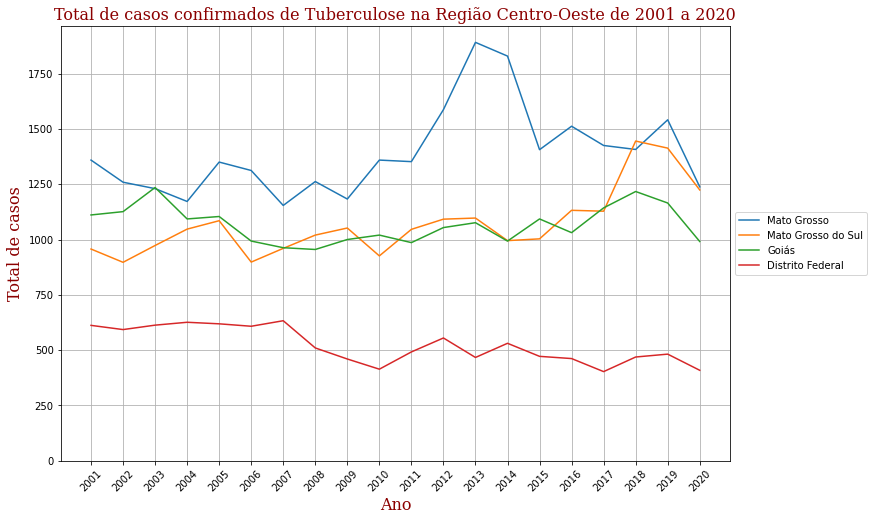

In [232]:
plot_centroeste=plotar(centroeste_casos,"total_de_casos", "Total de casos", "Total de casos confirmados de Tuberculose na Região Centro-Oeste de 2001 a 2020", 'darkred')

##**Resultados:**

**Foi possível perceber uma tendência de queda da cobertura da vacina BCG no Brasil e uma tendência de crescimento dos casos nos últimos anos. Para tentar melhor entender se há relação entre os dois, vamos visualizar o comportamento dos dados ao longo do tempo para os Estados onde foi percebida um maior aumento do número de casos.**

**A seguir, temos a comparação para cinco Estados, um de cada uma das regiões do Brasil:**

**Pará:** Desde 2015 a cobertura vacinal da BCG no estado é menor que 100 e de 2016 a 2019 o número de casos aumentou consideravelmente, indo de cerca de 4000 até 5500 casos, um aumento de 37,5% no número de casos no período.

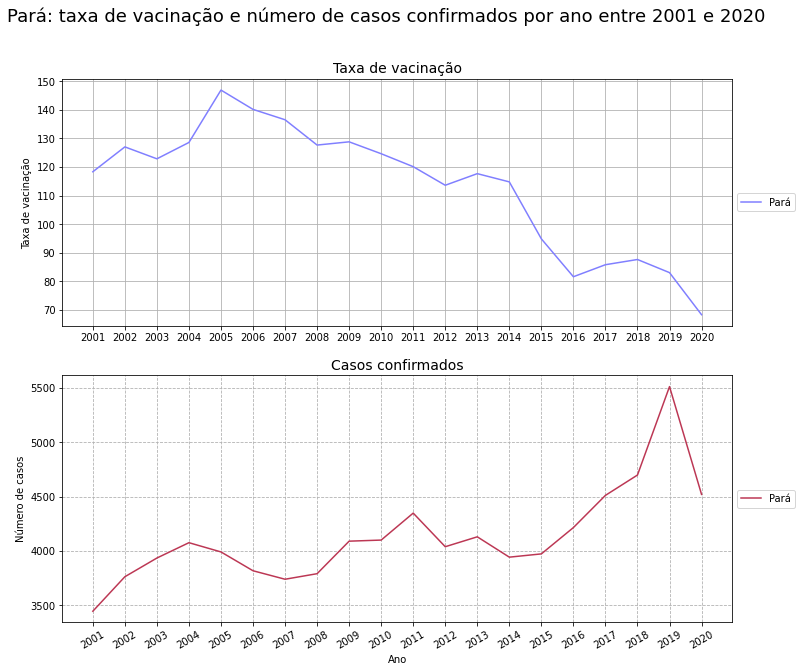

In [257]:
fig, axis = plt.subplots(2, 1, figsize=(12, 10))
ax1=sns.lineplot(data=norte.query('uf=="Pará"'), x='ano', y="taxa_de_vacinacao", hue="uf", palette="cool", ax=axis[0])
ax2=sns.lineplot(data=norte_casos.query('uf=="Pará"'), x="ano", y="total_de_casos", hue="uf", palette="inferno", ax=axis[1])

plt.xticks(rotation=30)
plt.grid(linestyle="--")
axis[0].set_xlabel(None)
axis[0].grid(True)
axis[0].set_title("Taxa de vacinação", fontsize=14)
axis[1].set_title("Casos confirmados", fontsize=14)
plt.suptitle("Pará: taxa de vacinação e número de casos confirmados por ano entre 2001 e 2020", fontsize=18)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel("Ano")
ax1.set_ylabel("Taxa de vacinação")
ax2.set_ylabel("Número de casos")
plt.show()

**Rio Grande do Norte:** A cobertura vacinal ficou abaixo de 100% em 2016 e 2017, sendo que neste último teve uma cobertura inferior a 70%. Em 2018, a cobertura se elevou acima dos 100% e então caiu novamente nos anos seguintes. O número de casos se elevou desde 2016 com um pico de casos em 2018, chegando a registrar 1600 casos, 400 a mais que o número de casos de 2016, o primeiro ano de queda abaixo dos 100% de cobertura.

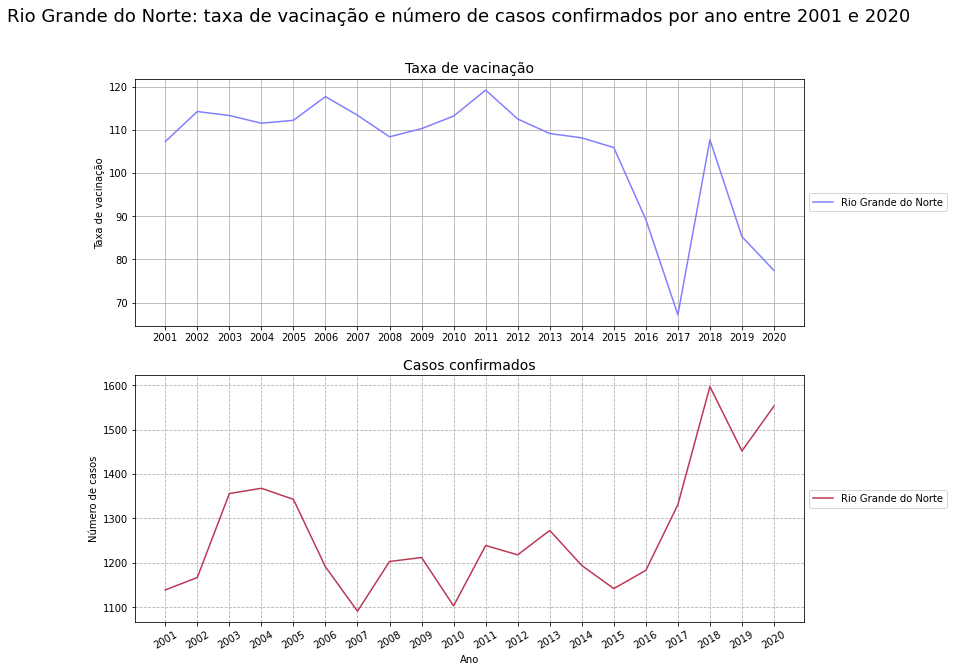

In [258]:
fig, axis = plt.subplots(2, 1, figsize=(12, 10))
ax1=sns.lineplot(data=nordeste.query('uf=="Rio Grande do Norte"'), x='ano', y="taxa_de_vacinacao", hue="uf", palette="cool", ax=axis[0])
ax2=sns.lineplot(data=nordeste_casos.query('uf=="Rio Grande do Norte"'), x="ano", y="total_de_casos", hue="uf", palette="inferno", ax=axis[1])

plt.xticks(rotation=30)
plt.grid(linestyle="--")
axis[0].set_xlabel(None)
axis[0].grid(True)
axis[0].set_title("Taxa de vacinação", fontsize=14)
axis[1].set_title("Casos confirmados", fontsize=14)
plt.suptitle("Rio Grande do Norte: taxa de vacinação e número de casos confirmados por ano entre 2001 e 2020", fontsize=18)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel("Ano")
ax1.set_ylabel("Taxa de vacinação")
ax2.set_ylabel("Número de casos")
plt.show()

**São Paulo:** A cobertura vacinal ficou abaixo dos 100% em 2016, 2019 e 2020. Em 2017 o número de casos ficou em 22.000, um aumento de 7,8% em relação a 2016. O número de casos voltou a cair em 2020.

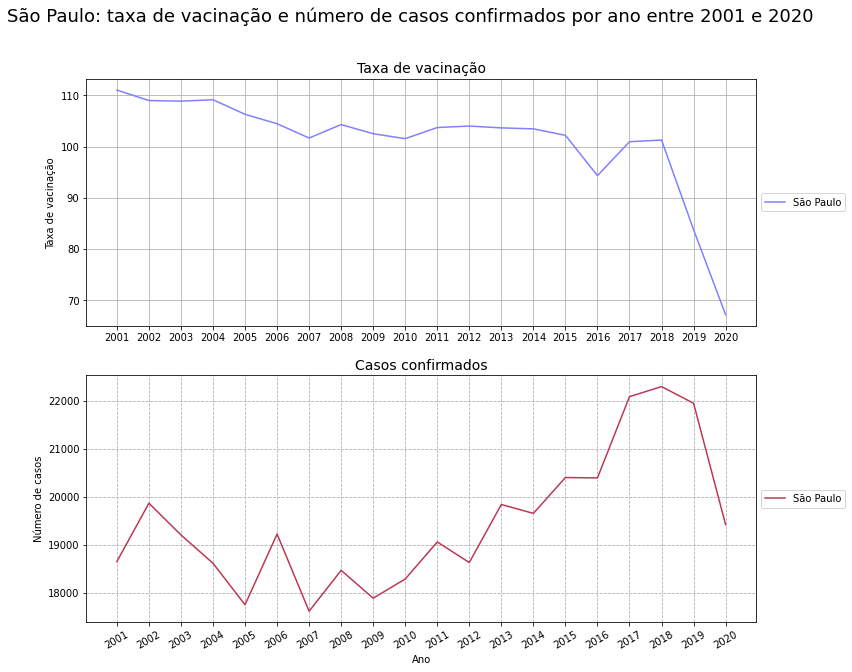

In [259]:
fig, axis = plt.subplots(2, 1, figsize=(12, 10))
ax1=sns.lineplot(data=sudeste.query('uf=="São Paulo"'), x='ano', y="taxa_de_vacinacao", hue="uf", palette="cool", ax=axis[0])
ax2=sns.lineplot(data=sudeste_casos.query('uf=="São Paulo"'), x="ano", y="total_de_casos", hue="uf", palette="inferno", ax=axis[1])

plt.xticks(rotation=30)
plt.grid(linestyle="--")
axis[0].set_xlabel(None)
axis[0].grid(True)
axis[0].set_title("Taxa de vacinação", fontsize=14)
axis[1].set_title("Casos confirmados", fontsize=14)
plt.suptitle("São Paulo: taxa de vacinação e número de casos confirmados por ano entre 2001 e 2020", fontsize=18)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel("Ano")
ax1.set_ylabel("Taxa de vacinação")
ax2.set_ylabel("Número de casos")
plt.show()

**Rio Grande do Sul:** A cobertura vacinal neste Estado se mantém abaixo dos 100% desde 2016 e o número de casos foi de 6000 em 2016 a mais de 7500 em 2019, um aumento de 25%.

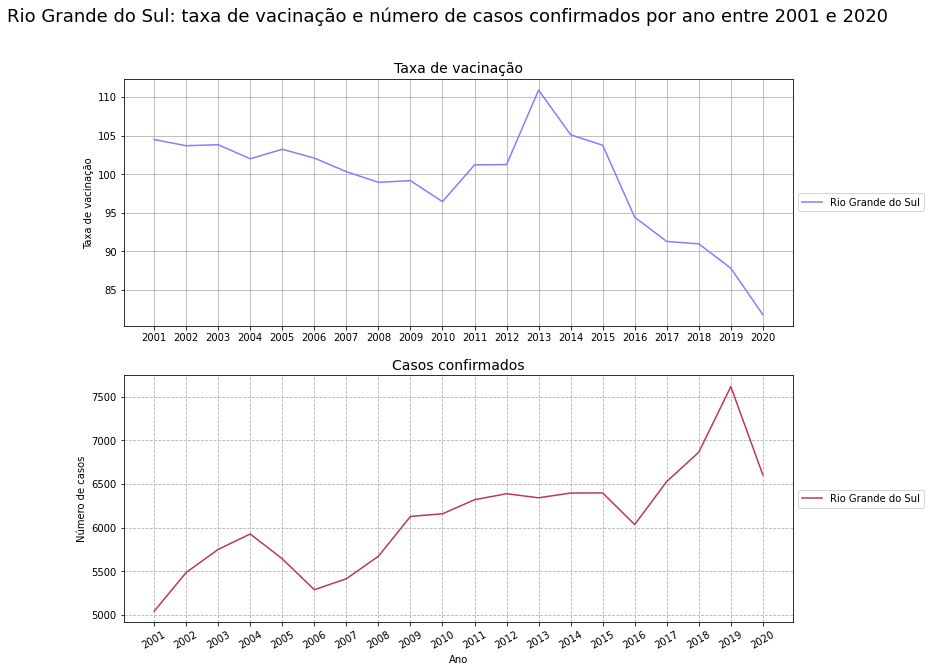

In [260]:
fig, axis = plt.subplots(2, 1, figsize=(12, 10))
ax1=sns.lineplot(data=sul.query('uf=="Rio Grande do Sul"'), x='ano', y="taxa_de_vacinacao", hue="uf", palette="cool", ax=axis[0])
ax2=sns.lineplot(data=sul_casos.query('uf=="Rio Grande do Sul"'), x="ano", y="total_de_casos", hue="uf", palette="inferno", ax=axis[1])

plt.xticks(rotation=30)
plt.grid(linestyle="--")
axis[0].set_xlabel(None)
axis[0].grid(True)
axis[0].set_title("Taxa de vacinação", fontsize=14)
axis[1].set_title("Casos confirmados", fontsize=14)
plt.suptitle("Rio Grande do Sul: taxa de vacinação e número de casos confirmados por ano entre 2001 e 2020", fontsize=18)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel("Ano")
ax1.set_ylabel("Taxa de vacinação")
ax2.set_ylabel("Número de casos")
plt.show()

No **Mato Grosso**, temos diversos picos de casos e de variação na cobertura, ficando difícil estabelecer uma conexão entre a cobertura vacinal e o número de casos.

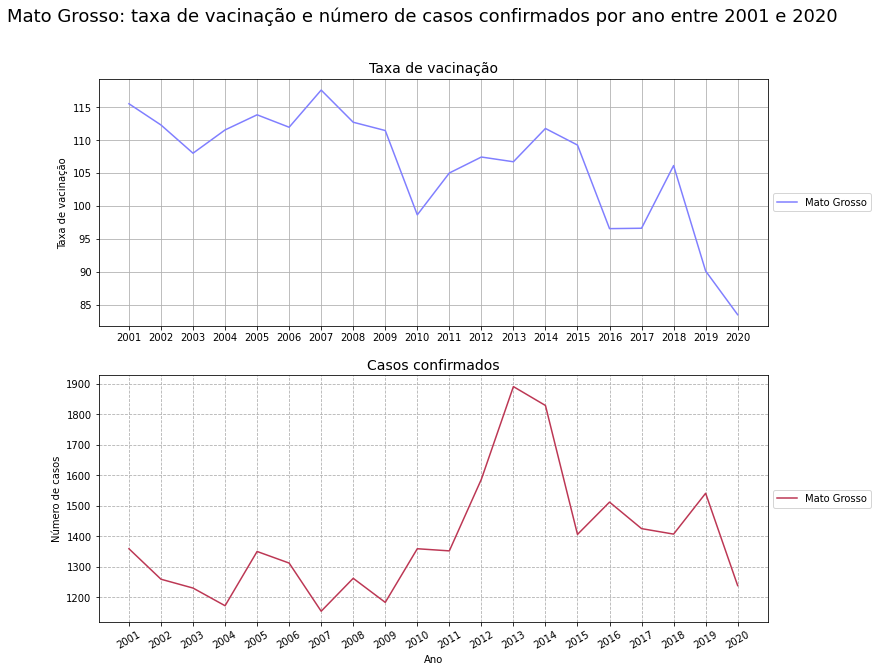

In [261]:
fig, axis = plt.subplots(2, 1, figsize=(12, 10))
ax1=sns.lineplot(data=centroeste.query('uf=="Mato Grosso"'), x='ano', y="taxa_de_vacinacao", hue="uf", palette="cool", ax=axis[0])
ax2=sns.lineplot(data=centroeste_casos.query('uf=="Mato Grosso"'), x="ano", y="total_de_casos", hue="uf", palette="inferno", ax=axis[1])

plt.xticks(rotation=30)
plt.grid(linestyle="--")
axis[0].set_xlabel(None)
axis[0].grid(True)
axis[0].set_title("Taxa de vacinação", fontsize=14)
axis[1].set_title("Casos confirmados", fontsize=14)
plt.suptitle("Mato Grosso: taxa de vacinação e número de casos confirmados por ano entre 2001 e 2020", fontsize=18)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel("Ano")
ax1.set_ylabel("Taxa de vacinação")
ax2.set_ylabel("Número de casos")
plt.show()

##**Conclusões:**

*  Houve queda da cobertura vacinal no Brasil, que se torna mais visível a partir de 2018.
* A média da cobertura vacinal variou entre 120% e 80% aproximadamente, sendo que a partir de 2016 esteve quase sempre abaixo dos 100%.
* Podemos ver que o número de casos subiu de um patamar de cerca de 85000 casos/ano e chegou a cerca de 97000 em 2019, o que representa um crescimento de 14% em relação ao patamar anterior. Em 2020, o total de casos voltou para perto da média de 85000 dos anos anteriores a 2017.
* Uma hipótese que explicaria a queda do número de casos em 2020, mesmo com uma cobertura vacinal baixa, em torno de 80%, seria a epidemia de Covid, que diminui consideravelmente o contato entre as pessoas, o que certamente contribui na diminuição do contágio das doenças respiratórias no geral.
* Em alguns Estados conseguimos perceber uma clara conexão dos períodos de baixa na cobertura vacinal e de aumento do número de casos, enquanto que para outros essa conexão não é tão evidente.
* A cobertura vacinal não é um dado preciso, não é possível ter certeza que 100% do público alvo foi vacinado mesmo quando essa taxa está acima dos 100%, porque ela se baseia numa estimativa da população com a idade alvo e que portanto esta sujeita a ser maior ou menor que o estimado.


##**Referências:**
<li>Vacina BCG: eficácia e indicações da vacinação e da revacinação 
https://www.scielo.br/j/jped/a/TCg8DMtnxLMtRfRvFb5QxZs/?lang=pt</li>
 <li> Vale a pena insistir na vacina BCG? https://revistapesquisa.fapesp.br/vale-a-pena-insistir-na-vacina-bcg/</li>
 <li> https://veja.abril.com.br/blog/diario-da-vacina/a-eficacia-das-vacinas-que-voce-certamente-ja-tomou-na-vida/</li>
 <li>https://www.flickr.com/photos/selfmagazine/48545839516/in/album-72157710332198661/</li>
 <li>http://www.ripsa.org.br/fichasIDB/pdf/ficha_F.13.pdf</li>
 <li>http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf</li>